# ***Heart Failure Prediction***

**Setup and Dataset Fetch via KaggleHub**


In [ ]:
!pip install kaggle kagglehub --quiet

import kagglehub
import zipfile
import os

# Download dataset
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")
print("Dataset path:", path)

# Manually unzip the downloaded file
if path.endswith(".zip"):
    with zipfile.ZipFile(path, 'r') as zip_ref:
        zip_ref.extractall(os.path.dirname(path))
    print("Dataset unzipped to:", os.path.dirname(path))

Dataset path: /kaggle/input/heart-failure-prediction


**Connect Google Drive**

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load and Explore Images**

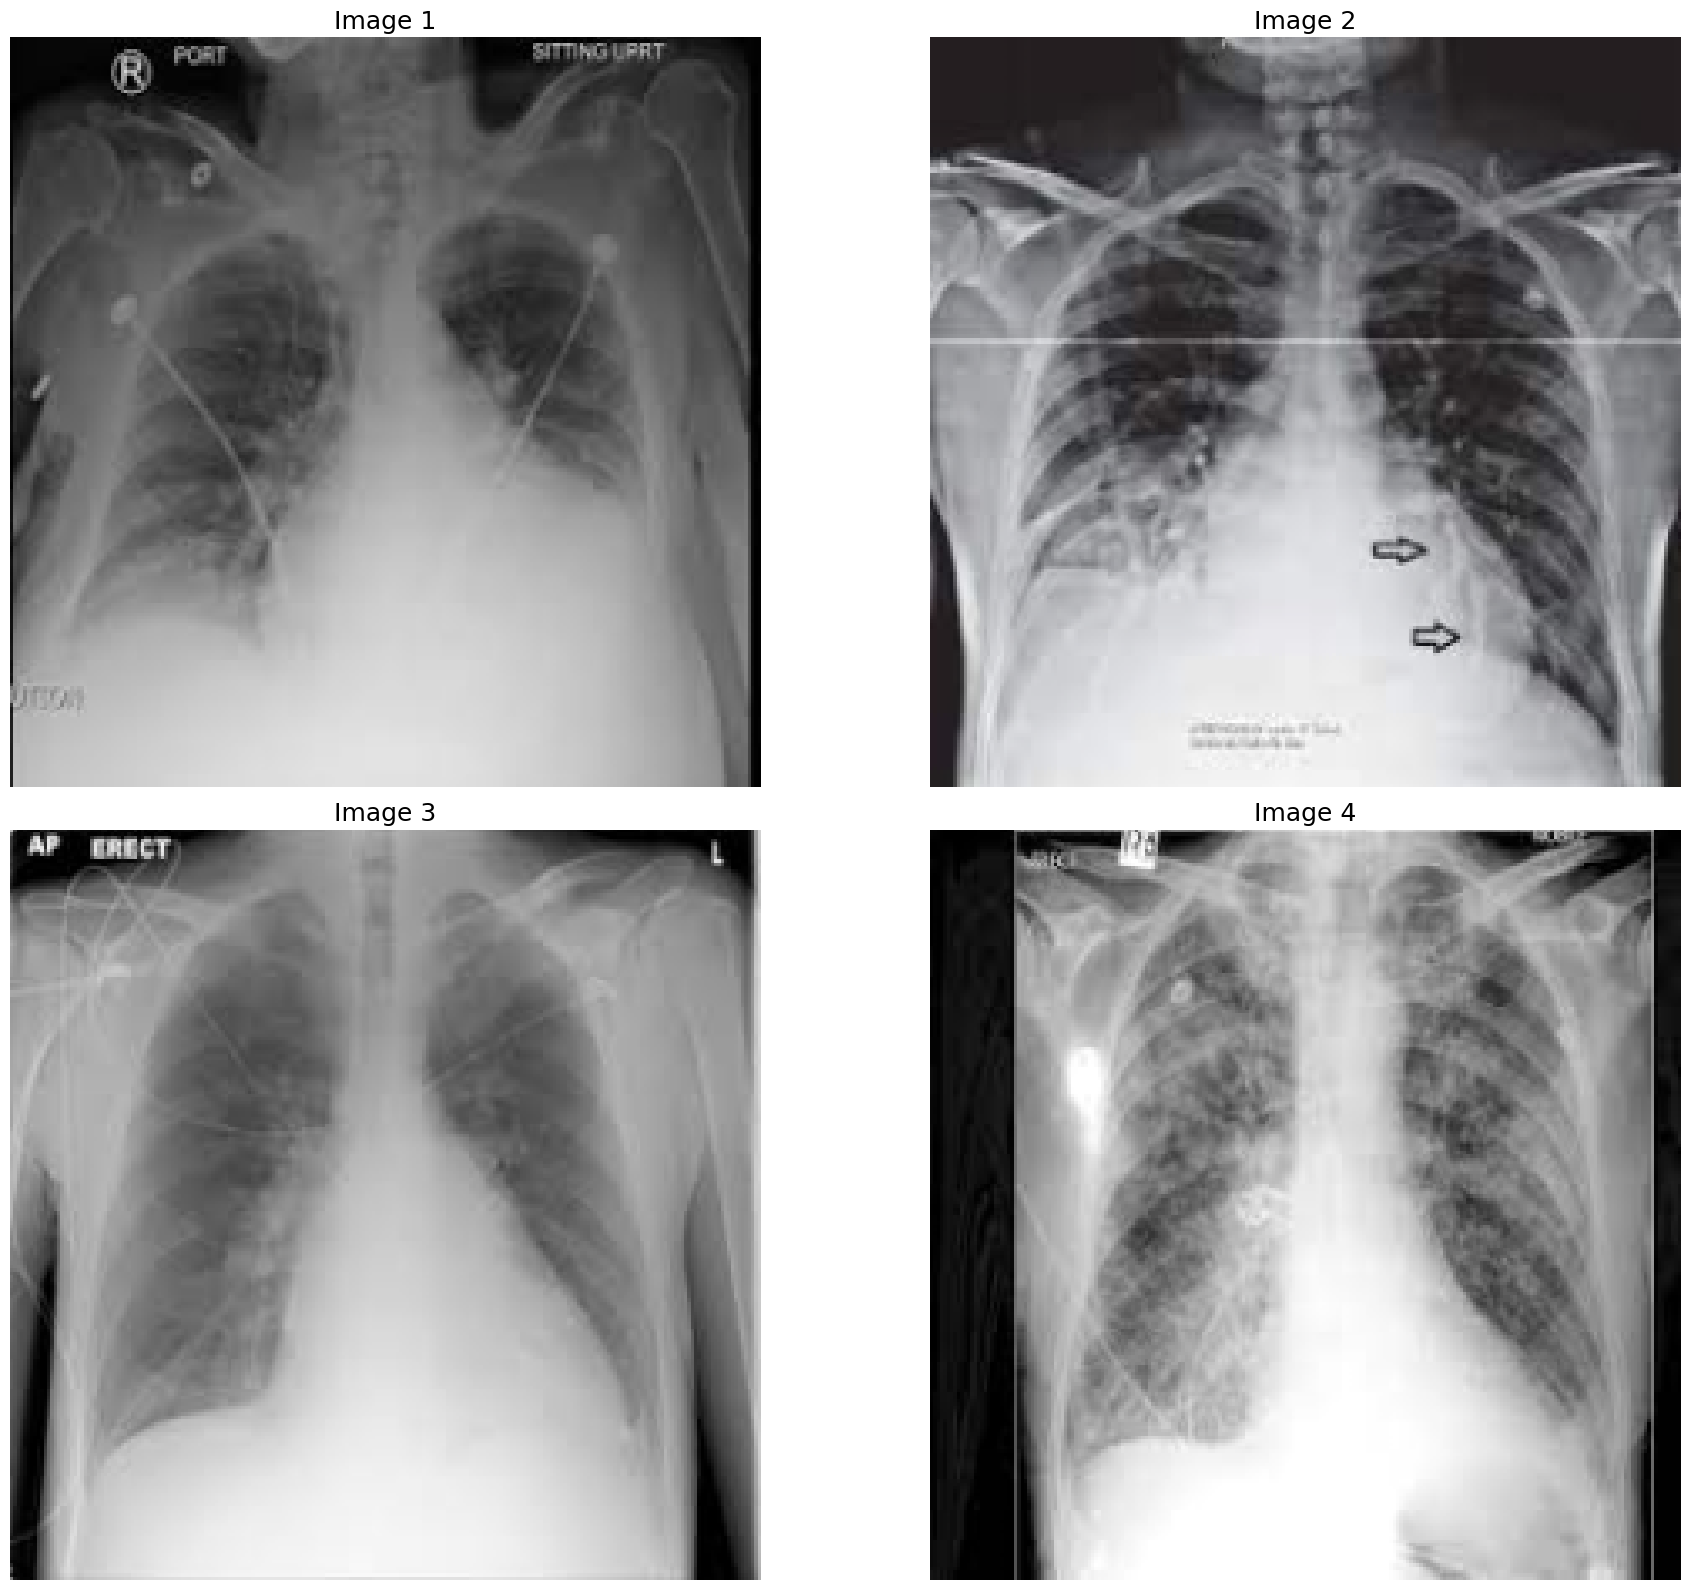

In [2]:
import os
import cv2
import matplotlib.pyplot as plt

# Set your dataset directory
data_dir = '/content/drive/MyDrive/heart-failure-prediction-image'

# Image paths relative to data_dir
images_path = [
    '/content/drive/MyDrive/heart-failure-prediction-image/images (1).jpeg',
    '/content/drive/MyDrive/heart-failure-prediction-image/images (3).jpeg',
    '/content/drive/MyDrive/heart-failure-prediction-image/images (5).jpeg',
    '/content/drive/MyDrive/heart-failure-prediction-image/images (8).jpeg'
]

# Plot
plt.figure(figsize=(20, 16))

for i in range(len(images_path)):
    ax = plt.subplot(2, 2, i + 1)

    # Correct path
    img_path = os.path.join(data_dir, images_path[i])

    # Read and convert color
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize (optional)
    img = cv2.resize(img, (224, 224))

    # Show image
    plt.imshow(img)
    plt.title(f"Image {i+1}", fontsize=18)
    plt.axis('off')

plt.tight_layout()
plt.show()


**Load and Explore Dataset**

In [ ]:
import pandas as pd

data = pd.read_csv(path + "/heart.csv")
print(data.shape)
print(data.head())
print(data['HeartDisease'].value_counts())


(918, 12)
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
HeartDisease
1    508
0    410
Name: count, dtype: int64


**Resizing the Images**

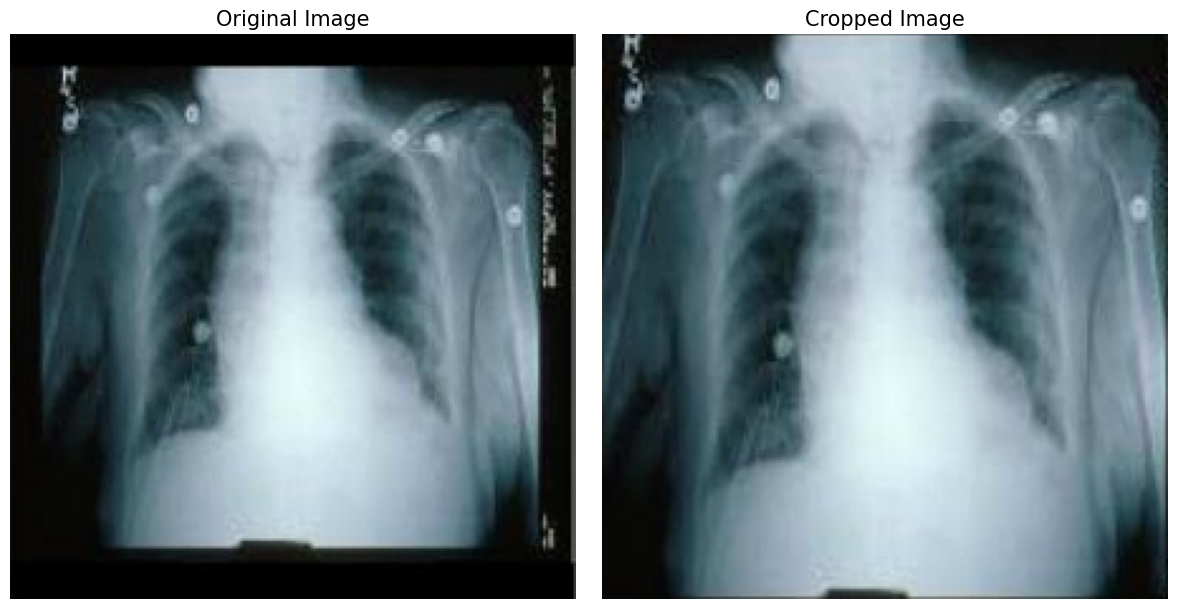

In [14]:
import cv2
import matplotlib.pyplot as plt
import imutils
import os

# Image Cropping Function
def crop_img(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # use RGB input
    gray = cv2.GaussianBlur(gray, (3, 3), 0)
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    if len(cnts) == 0:
        return img  # no contours found, return original

    c = max(cnts, key=cv2.contourArea)

    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    ADD_PIXELS = 0
    new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
    return new_img

# Read image
img_path = '/content/drive/MyDrive/heart-failure-prediction-image/35145tn.jpg'

# Verify if the image file exists and handle potential loading errors
if os.path.exists(img_path):
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    else:
        print(f"Error: Could not load image from {img_path}. Please check the file path and ensure the image is not corrupted.")

else:
    print(f"Error: Image file not found at {img_path}. Please check the file path.")

# Proceed with cropping and plotting only if the image was loaded successfully
if img is not None:
    # Crop image
    cropped_img = crop_img(img)

    # Resize after cropping (if needed)
    img_resized = cv2.resize(img, (224, 224))
    cropped_resized = cv2.resize(cropped_img, (224, 224))

    # Plot
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(img_resized)
    plt.title('Original Image', fontsize=15)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cropped_resized)
    plt.title('Cropped Image', fontsize=15)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

**Normalization & Visualization Images**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading images from /content/drive/MyDrive/heart-failure-prediction-image ...


100%|██████████| 20/20 [00:00<00:00, 92.40it/s] 



 Loaded 20 images
Each image shape: (224, 224, 3)


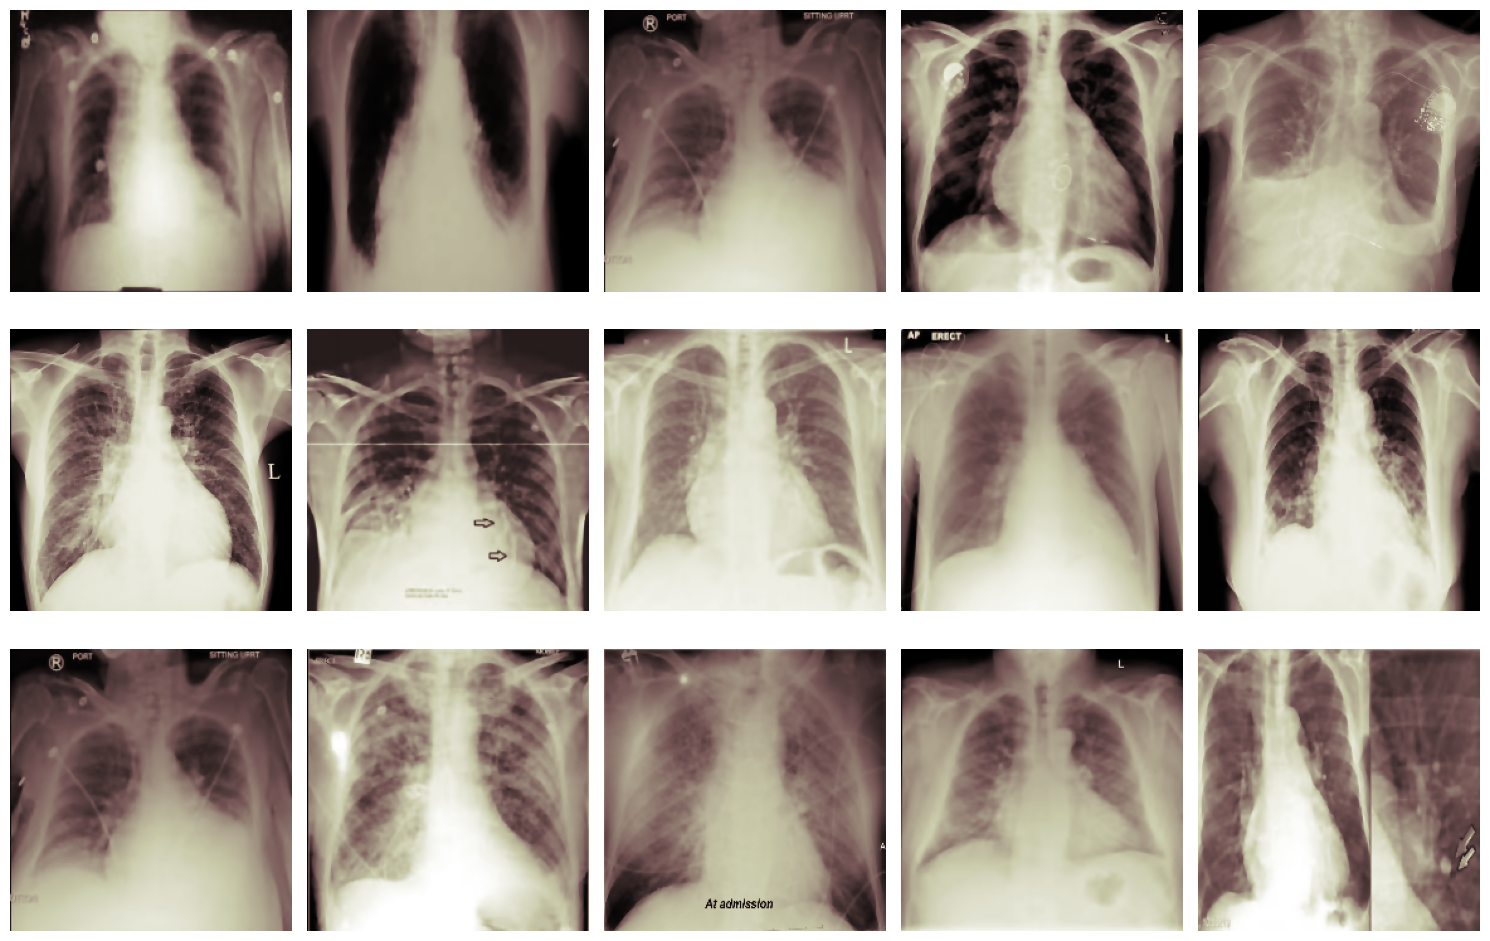

In [22]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import imutils


# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Data path
data_path = '/content/drive/MyDrive/heart-failure-prediction-image'

# Prepare lists
X = []

image_size = 224

# Load images
print(f"Loading images from {data_path} ...")
for img_name in tqdm(os.listdir(data_path)):
    img_path = os.path.join(data_path, img_name)
    if img_path.lower().endswith(('.jpg', '.jpeg', '.png')):
        img = cv2.imread(img_path)
        if img is not None and np.sum(img) > 0:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = crop_img(img)
            img = cv2.resize(img, (image_size, image_size))
            img = cv2.bilateralFilter(img, 5, 75, 75)
            img = cv2.applyColorMap(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), cv2.COLORMAP_BONE)
            X.append(img)
        else:
            print(f"Skipping invalid/blank image: {img_name}")

# Convert to array and normalize
X = np.array(X) / 255.0

print("\n Loaded", X.shape[0], "images")
print("Each image shape:", X.shape[1:])

# Visualize 15 random images
if X.shape[0] > 0:
    fig, axes = plt.subplots(3, 5, figsize=(15, 10))
    axes = axes.flatten()
    for img, ax in zip(X[:15], axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No valid images found.")


**Preprocess Dataset (Encoding, Scaling, Splitting)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical columns
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
data[categorical_cols] = data[categorical_cols].apply(LabelEncoder().fit_transform)

# Features and target
X = data.drop("HeartDisease", axis=1)
y = data["HeartDisease"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train, val, test
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


**Data Augmentation**

In [21]:
import tensorflow as tf
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Example using data augmentation
inputs = layers.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = layers.Conv2D(32, (3,3), activation='relu')(x)
# continue building model...


**Build CNN model using ReLU activation**

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')  # Binary classification output
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,497 (42.61 MB)

 Trainable params: 11,169,793 (42.61 MB)

 Non-trainable params: 704 (2.75 KB)

**Callbacks (EarlyStopping, ReduceLROnPlateau, Checkpoint)**

In [ ]:
early_stop = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(patience=5, factor=0.5, verbose=1)
checkpoint = callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)

cb_list = [early_stop, reduce_lr, checkpoint]


**Train Model with Accuracy and Loss Plot**

Epoch 1/100
17/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6667 - loss: 0.6007

21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.6813 - loss: 0.5867 - val_accuracy: 0.8478 - val_loss: 0.4498 - learning_rate: 0.0010
Epoch 2/100
16/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8258 - loss: 0.4185

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8216 - loss: 0.4300 - val_accuracy: 0.8551 - val_loss: 0.4310 - learning_rate: 0.0010
Epoch 3/100
12/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8254 - loss: 0.4504 

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8280 - loss: 0.4273 - val_accuracy: 0.8696 - val_loss: 0.4213 - learning_rate: 0.0010
Epoch 4/100
11/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8305 - loss: 0.4588  

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8325 - loss: 0.4290 - val_accuracy: 0.8478 - val_loss: 0.4134 - learning_rate: 0.0010
Epoch 5/100
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8759 - loss: 0.3332

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8737 - loss: 0.3377 - val_accuracy: 0.8478 - val_loss: 0.3978 - learning_rate: 0.0010
Epoch 6/100
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8455 - loss: 0.3776  

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8438 - loss: 0.3785 - val_accuracy: 0.8551 - val_loss: 0.3918 - learning_rate: 0.0010
Epoch 7/100
18/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8406 - loss: 0.3881  

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8414 - loss: 0.3873 - val_accuracy: 0.8478 - val_loss: 0.3736 - learning_rate: 0.0010
Epoch 8/100
18/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8244 - loss: 0.3963  

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8246 - loss: 0.3917 - val_accuracy: 0.8478 - val_loss: 0.3707 - learning_rate: 0.0010
Epoch 9/100
18/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8555 - loss: 0.3525  

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8551 - loss: 0.3517 - val_accuracy: 0.8406 - val_loss: 0.3503 - learning_rate: 0.0010
Epoch 10/100
18/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8778 - loss: 0.2989  

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8754 - loss: 0.3040 - val_accuracy: 0.8551 - val_loss: 0.3389 - learning_rate: 0.0010
Epoch 11/100
17/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8481 - loss: 0.3569  

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8534 - loss: 0.3524 - val_accuracy: 0.8841 - val_loss: 0.3198 - learning_rate: 0.0010
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8554 - loss: 0.3171 - val_accuracy: 0.8768 - val_loss: 0.3233 - learning_rate: 0.0010
Epoch 13/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8582 - loss: 0.3608 - val_accuracy: 0.8551 - val_loss: 0.3238 - learning_rate: 0.0010
Epoch 14/100
18/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8646 - loss: 0.3037 

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8658 - loss: 0.3051 - val_accuracy: 0.8551 - val_loss: 0.3117 - learning_rate: 0.0010
Epoch 15/100
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8625 - loss: 0.2961  

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8629 - loss: 0.3005 - val_accuracy: 0.8551 - val_loss: 0.3013 - learning_rate: 0.0010
Epoch 16/100
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8544 - loss: 0.3169  

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8552 - loss: 0.3169 - val_accuracy: 0.8768 - val_loss: 0.2918 - learning_rate: 0.0010
Epoch 17/100
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8820 - loss: 0.2886 

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8798 - loss: 0.2923 - val_accuracy: 0.8768 - val_loss: 0.2861 - learning_rate: 0.0010
Epoch 18/100
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8666 - loss: 0.3071  

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8666 - loss: 0.3083 - val_accuracy: 0.8768 - val_loss: 0.2836 - learning_rate: 0.0010
Epoch 19/100
18/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8634 - loss: 0.3556 

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8664 - loss: 0.3499 - val_accuracy: 0.8696 - val_loss: 0.2795 - learning_rate: 0.0010
Epoch 20/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8761 - loss: 0.3062 - val_accuracy: 0.8696 - val_loss: 0.2795 - learning_rate: 0.0010
Epoch 21/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8927 - loss: 0.2702 - val_accuracy: 0.8768 - val_loss: 0.2877 - learning_rate: 0.0010
Epoch 22/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8817 - loss: 0.3036 - val_accuracy: 0.8768 - val_loss: 0.2812 - learning_rate: 0.0010
Epoch 23/100
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8678 - loss: 0.3196  

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8676 - loss: 0.3209 - val_accuracy: 0.8841 - val_loss: 0.2774 - learning_rate: 0.0010
Epoch 24/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8778 - loss: 0.3138 - val_accuracy: 0.8768 - val_loss: 0.2778 - learning_rate: 0.0010
Epoch 25/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8855 - loss: 0.3049 - val_accuracy: 0.8841 - val_loss: 0.2828 - learning_rate: 0.0010
Epoch 26/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8716 - loss: 0.3063 - val_accuracy: 0.8913 - val_loss: 0.2786 - learning_rate: 0.0010
Epoch 27/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8725 - loss: 0.3233 - val_accuracy: 0.8768 - val_loss: 0.2783 - learning_rate: 0.0010
Epoch 28/100
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8797 - loss: 0.2728 

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8795 - loss: 0.2745 - val_accuracy: 0.8913 - val_loss: 0.2745 - learning_rate: 0.0010
Epoch 29/100
14/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8887 - loss: 0.2743  

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8897 - loss: 0.2721 - val_accuracy: 0.8913 - val_loss: 0.2708 - learning_rate: 0.0010
Epoch 30/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8624 - loss: 0.3184 - val_accuracy: 0.8841 - val_loss: 0.2713 - learning_rate: 0.0010
Epoch 31/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9065 - loss: 0.2484 - val_accuracy: 0.8841 - val_loss: 0.2743 - learning_rate: 0.0010
Epoch 32/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8763 - loss: 0.2790 - val_accuracy: 0.8841 - val_loss: 0.2708 - learning_rate: 0.0010
Epoch 33/100
15/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9158 - loss: 0.2349 

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9094 - loss: 0.2490 - val_accuracy: 0.8913 - val_loss: 0.2654 - learning_rate: 0.0010
Epoch 34/100
17/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8904 - loss: 0.2981 

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8884 - loss: 0.2979 - val_accuracy: 0.8986 - val_loss: 0.2627 - learning_rate: 0.0010
Epoch 35/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8679 - loss: 0.2950 - val_accuracy: 0.8986 - val_loss: 0.2702 - learning_rate: 0.0010
Epoch 36/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8822 - loss: 0.2745 - val_accuracy: 0.8986 - val_loss: 0.2686 - learning_rate: 0.0010
Epoch 37/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8869 - loss: 0.2496 - val_accuracy: 0.8841 - val_loss: 0.2655 - learning_rate: 0.0010
Epoch 38/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8758 - loss: 0.3027 - val_accuracy: 0.8913 - val_loss: 0.2746 - learning_rate: 0.0010
Epoch 39/100
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8632 - loss: 0.3136 
Epoch 39: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8633 - loss: 0.3130 - val_accuracy: 

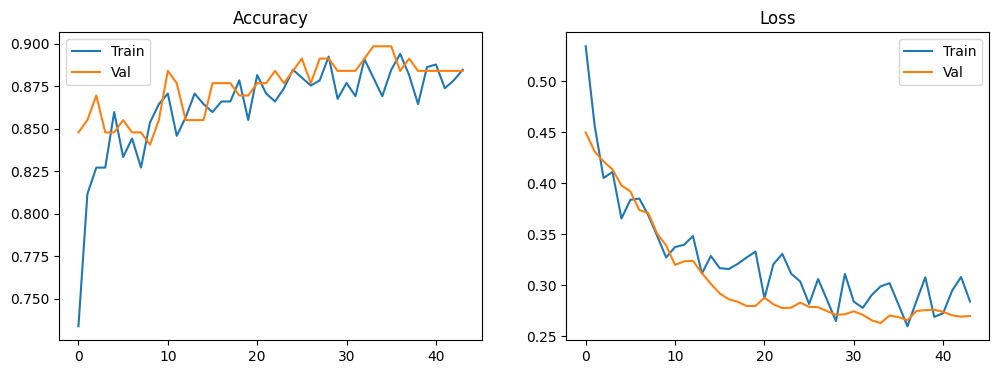

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=cb_list,
    verbose=1
)

# Plot training history
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 4))
    for i, key in enumerate(['accuracy', 'loss']):
        plt.subplot(1, 2, i+1)
        plt.plot(history.history[key], label='Train')
        plt.plot(history.history['val_' + key], label='Val')
        plt.title(key.capitalize())
        plt.legend()
    plt.show()

plot_history(history)


**Evaluation (Confusion Matrix, Report, AUC)**

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


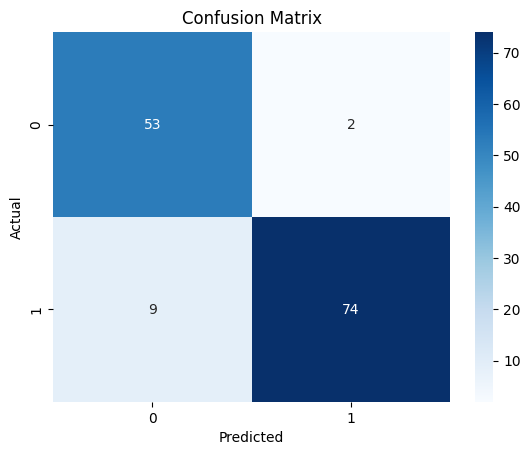

              precision    recall  f1-score   support

           0       0.85      0.96      0.91        55
           1       0.97      0.89      0.93        83

    accuracy                           0.92       138
   macro avg       0.91      0.93      0.92       138
weighted avg       0.93      0.92      0.92       138

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
AUC Score: 0.9538
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


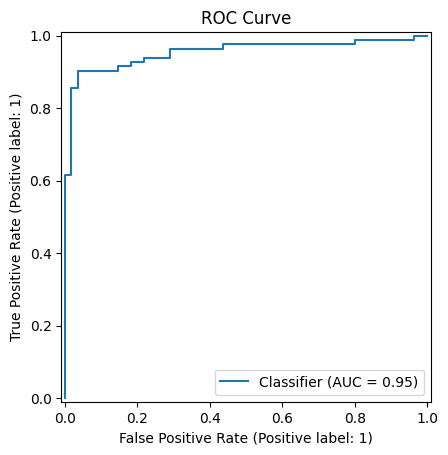

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
import seaborn as sns
import numpy as np

# Predict and evaluate
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Report
print(classification_report(y_test, y_pred))

# AUC
auc = roc_auc_score(y_test, model.predict(X_test))
print("AUC Score:", round(auc, 4))

# ROC Curve
RocCurveDisplay.from_predictions(y_test, model.predict(X_test))
plt.title("ROC Curve")
plt.show()
